# Import Library

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Import Data
Source: https://archive.ics.uci.edu/ml/datasets/Maternal+Health+Risk+Data+Set

In [222]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [223]:
df['RiskLevel'] = df['RiskLevel'].apply(lambda x: 0 if x=='low risk' else 1)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,1
1,35,140,90,13.0,98.0,70,1
2,29,90,70,8.0,100.0,80,1
3,30,140,85,7.0,98.0,70,1
4,35,120,60,6.1,98.0,76,0


## Histogram

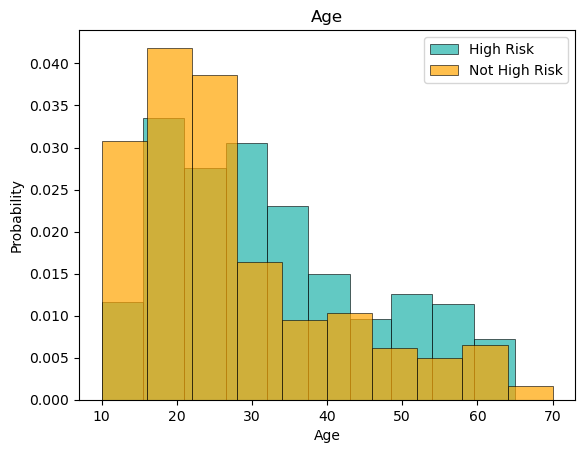

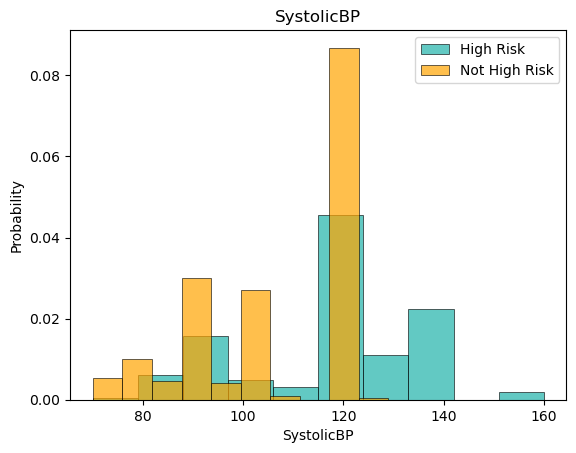

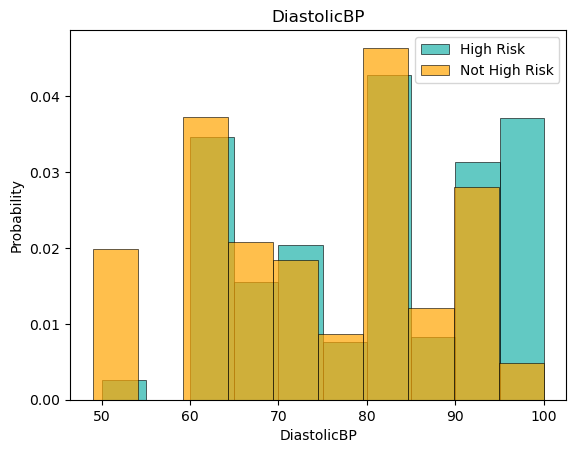

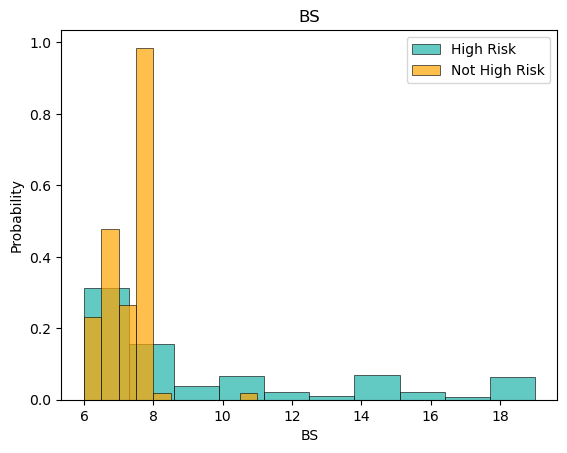

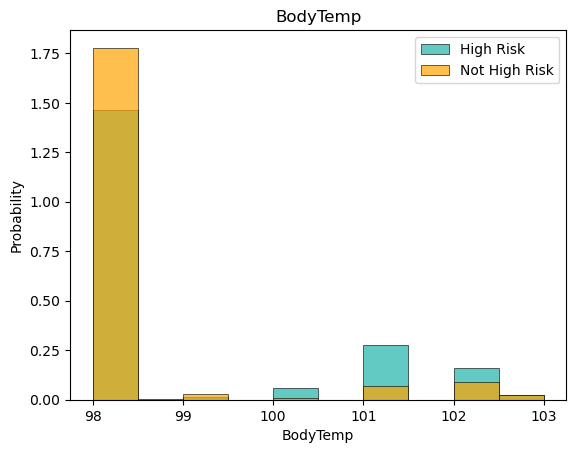

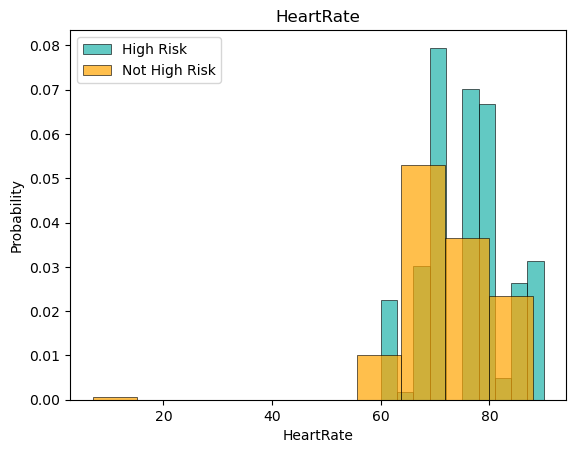

In [224]:
for label in df.columns[:-1]:
    plt.hist(df[df["RiskLevel"]==1][label], color='lightseagreen',  edgecolor='black', linewidth=0.6, label='High Risk', alpha=0.7, density=True)
    plt.hist(df[df["RiskLevel"]==0][label], color='orange',  edgecolor='black', linewidth=0.6, label='Not High Risk', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [225]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [226]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [227]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

## K-Nearest Neighbor

In [228]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [229]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [230]:
y_pred = knn_model.predict(X_test)

In [231]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72        77
           1       0.86      0.75      0.80       126

    accuracy                           0.77       203
   macro avg       0.76      0.77      0.76       203
weighted avg       0.78      0.77      0.77       203



## Naive Bayes

In [232]:
from sklearn.naive_bayes import GaussianNB

In [233]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [234]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.95      0.69        77
           1       0.94      0.52      0.67       126

    accuracy                           0.68       203
   macro avg       0.74      0.73      0.68       203
weighted avg       0.79      0.68      0.68       203



## Logistic Regression

In [235]:
from sklearn.linear_model import LogisticRegression

In [236]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [237]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.92      0.74        77
           1       0.93      0.64      0.76       126

    accuracy                           0.75       203
   macro avg       0.77      0.78      0.75       203
weighted avg       0.81      0.75      0.75       203



## Support Vector Machine

In [238]:
from sklearn.svm import SVC

In [239]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [240]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.91      0.73        77
           1       0.92      0.65      0.76       126

    accuracy                           0.75       203
   macro avg       0.77      0.78      0.75       203
weighted avg       0.80      0.75      0.75       203



## Nerual Network

In [241]:
import tensorflow as tf

In [242]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

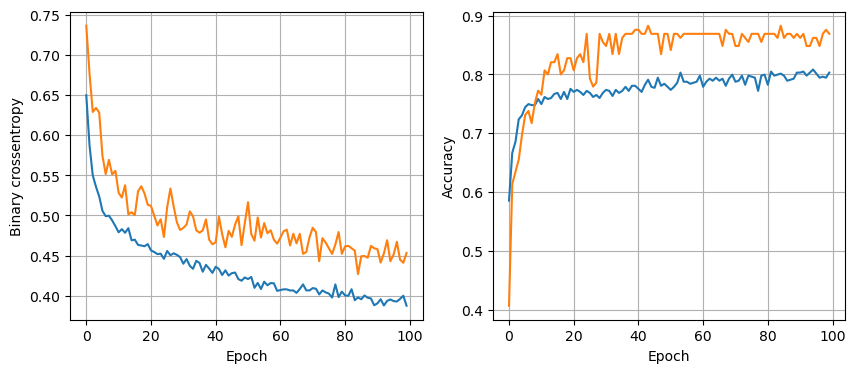

In [243]:
nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(32, activation='relu', input_shape=(6,)),
      tf.keras.layers.Dropout(0.0),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',metrics=['accuracy'])
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
plot_history(history)

In [244]:
y_pred = nn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

7/7 [==============================] - 0s 1ms/step


In [245]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.92      0.74        77
           1       0.93      0.65      0.77       126

    accuracy                           0.75       203
   macro avg       0.77      0.79      0.75       203
weighted avg       0.81      0.75      0.76       203

